<a href="https://colab.research.google.com/github/therealfortune/DA-Portfolio-Project/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

AFTER NUMEROUS ERRORS , I REALIZED THAT THE Y IN THE DATE SHOULD BE CAPITALIZED

In [2]:
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 85)

In [3]:
td_date = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
pb = pd.read_csv(r'/content/purchase_behaviour.csv')
td = pd.read_csv(r'/content/transaction_data.csv', parse_dates=['DATE'], date_parser=td_date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


PLEASE NOTE THAT THE DATE FORMAT HAS ALREADY BEEN CONVERTED IN EXCEL

In [4]:
td

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


THERE ARE NO MISSING VALUES IN THE TRANSACTION DATA

In [5]:
for col in td.columns:
    pct_missing = np.mean(td[col].isnull())
    print('{} --> {}'.format(col, round(pct_missing)))

DATE --> 0
STORE_NBR --> 0
LYLTY_CARD_NBR --> 0
TXN_ID --> 0
PROD_NBR --> 0
PROD_NAME --> 0
PROD_QTY --> 0
TOT_SALES --> 0


THERE ARE NO MISSING VALUES IN THE PURCHASE BEHAVIOUR DATA

In [6]:
    for col in pb.columns:
        pct_missing = np.mean(pb[col].isnull())
        print('{} --> {}'.format(col, round(pct_missing)))

LYLTY_CARD_NBR --> 0
LIFESTAGE --> 0
PREMIUM_CUSTOMER --> 0


In [7]:
td.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [8]:
pb.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [9]:
td['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

I REALIZED THAT SOME PART OF THE PROD\_NAME IS MISPELT , CHP INSTEAD OF CHIPS

In [10]:
# filt1 = td['PROD_NAME'].str.contains('Chp', na=False)
# td = td.loc[filt1]
td['PROD_NAME'] = td['PROD_NAME'].str.replace('Chp','Chip')
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8


Let's remove all the & and replace it with and to make the data look better 

In [11]:
# filt2 = td['PROD_NAME'].str.contains('&', na=False)
# td = td.loc[filt2]
td['PROD_NAME'] = td['PROD_NAME'].str.replace('&',' and ')
td.head()
td['PROD_NAME'] = td['PROD_NAME'].str.replace('  ',' ')
td.head()
td['PROD_NAME'] = td['PROD_NAME'].str.replace('   ',' ')
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8


WE NEED JUST THE CHIPS

In [12]:
filt = td['PROD_NAME'].str.contains('Chip', na=False)

In [13]:
chips = td.loc[filt]

In [14]:
chips.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt and Vinegar 330g,1,5.7


In [15]:
!data.to_csv(chips, header = False)

/bin/bash: -c: line 0: syntax error near unexpected token `chips,'
/bin/bash: -c: line 0: `data.to_csv(chips, header = False)'


In [16]:
from google.colab import files
!files.download('chips.csv')

/bin/bash: -c: line 0: syntax error near unexpected token `'chips.csv''
/bin/bash: -c: line 0: `files.download('chips.csv')'


In [17]:
chips['PROD_NAME'].unique().shape

(37,)

In [18]:
chips['PROD_NAME'].unique()

array(['Natural Chip  Compny SeaSalt175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream and Onion 175g',
       'Kettle Tortilla ChipsHny and Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt and Vinegar 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Thins Chips Light and  Tangy 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Smiths Chip Thinly Cut Original 175g',
       'Thins Chips   Originl saltd 175g',
       'Natural ChipCo Hony Soy Chckn175g',
       'Dorito Corn Chip Supreme 380g',
       'Thins Chips Seasonedchicken 175g',
       'Doritos Corn Chips Original 170g',
       'Cobs Popd Swt/Chlli and Sr/Cream Chips 110g',
       'Natural Chip Co Tmato Hrb and Spce 175g',
       'Smiths Crinkle Cut Chips Original 170g',
       'Cobs Popd Sea Salt Chips 110g',
       'Smiths Crinkle Cut Chips Chs and Onion170g',
       'French Fries Potato Chips 175g',
       'Doritos Corn Chips Cheese Supreme 170g',
       '

In [19]:
chips.sort_values(['PROD_QTY'], ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chip Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chip Supreme 380g,200,650.00
17077,2018-08-20,153,153161,152587,30,Doritos Corn Chips Cheese Supreme 170g,5,22.00
228570,2019-05-18,79,79169,77499,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,5,23.00
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.50
...,...,...,...,...,...,...,...,...
82501,2019-05-12,20,20443,17453,69,Smiths Chip Thinly S/Cream and Onion 175g,1,3.00
204161,2018-08-15,94,94162,93482,108,Kettle Tortilla ChipsHny and Jlpno Chili 150g,1,4.60
204155,2019-05-15,94,94132,93289,106,Natural ChipCo Hony Soy Chckn175g,1,3.00
22963,2019-05-29,195,195352,195255,110,WW Original Corn Chips 200g,1,1.90


In [20]:
chips['LYLTY_CARD_NBR'] = chips['LYLTY_CARD_NBR'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [22]:
Merged = pd.merge(chips, pb, how='inner',on = 'LYLTY_CARD_NBR')

In [23]:
Merged.sort_values(['PROD_QTY'], ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
23191,2019-05-20,226,226000.0,226210,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
23190,2018-08-19,226,226000.0,226201,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
67512,2018-08-15,223,223025.0,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5,YOUNG FAMILIES,Mainstream
44644,2018-08-19,62,62015.0,57858,75,Cobs Popd Sea Salt Chips 110g,5,19.0,RETIREES,Budget
67247,2019-05-14,40,40129.0,36720,78,Thins Chips Salt and Vinegar 175g,5,16.5,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
78336,2019-04-15,268,268310.0,264746,22,Thins Chips Originl saltd 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget
78337,2018-08-01,268,268311.0,264747,78,Thins Chips Salt and Vinegar 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget
7623,2018-12-02,195,195044.0,194875,4,Dorito Corn Chip Supreme 380g,1,6.5,MIDAGE SINGLES/COUPLES,Premium
78339,2019-03-29,268,268358.0,264791,28,Thins Potato Chips Hot and Spicy 175g,1,3.3,YOUNG SINGLES/COUPLES,Budget


APPARENTLY WE HAVE AN OUTLIER , CUSTOMER WITH <span style="font-size: 12px; text-align: right;">LYLTY_CARD_NBR</span><span style="font-size: 12px; font-weight: 700; text-align: right;">=</span><span style="font-size: 12px;">226000.0 HAS TWO PURCHASES OF PROD_QTY = 200&nbsp; WHICH IS UP TO 4000 PERCENT LARGER THAN THE SECOND HIGHEST PRODUCE , SO WE HAVE TO EXCLUDE THIS CUSTOMER FOR THE REST OF OUR ANALYSIS TO AVOID SKEWED RESULT</span>

In [24]:
lyt_check = Merged['LYLTY_CARD_NBR'] == 226000.0
lyt_check = Merged.loc[lyt_check].head()
lyt_check.sort_values('PROD_QTY', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
23190,2018-08-19,226,226000.0,226201,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium
23191,2019-05-20,226,226000.0,226210,4,Dorito Corn Chip Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [25]:
NewMerged = Merged['LYLTY_CARD_NBR'] != 226000.0
NewMerged = Merged.loc[NewMerged]
NewMerged.sort_values(['LIFESTAGE', 'PROD_QTY'], ascending=[True, False])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
2,2018-08-17,2,2373.0,974,69,Smiths Chip Thinly S/Cream and Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
67,2019-05-20,130,130108.0,134125,2,Cobs Popd Sour Crm and Chives Chips 110g,5,19.0,MIDAGE SINGLES/COUPLES,Budget
117,2018-08-20,186,186401.0,188768,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5,MIDAGE SINGLES/COUPLES,Budget
128,2019-05-17,222,222209.0,222693,40,Thins Chips Seasonedchicken 175g,5,16.5,MIDAGE SINGLES/COUPLES,Budget
1725,2019-05-18,24,24060.0,20619,61,Smiths Crinkle Cut Chips Chicken 170g,5,14.5,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
87310,2018-07-26,268,268098.0,264509,110,WW Original Corn Chips 200g,1,1.9,YOUNG SINGLES/COUPLES,Premium
87311,2018-07-19,268,268118.0,264530,75,Cobs Popd Sea Salt Chips 110g,1,3.8,YOUNG SINGLES/COUPLES,Premium
87312,2019-05-21,268,268157.0,264566,90,Tostitos Smoked Chipotle 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
87314,2018-10-07,268,268396.0,264841,8,Smiths Crinkle Cut Chips Original 170g,1,2.9,YOUNG SINGLES/COUPLES,Premium


In [26]:
NewMerged['PROD_NAME'].value_counts()

Kettle Tortilla ChipsHny and Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli and Sr/Cream Chips 110g      3269
Cobs Popd Sea Salt Chips 110g                    3265
Smiths Crnkle Chip Orgnl Big Bag 380g            3233
Thins Potato Chips Hot and Spicy 175g            3229
Doritos Corn Chips Cheese Supreme 170g           3217
Doritos Corn Chip Mexican Jalapeno 150g          3204
Smiths Crinkle Chips Salt and Vinegar 330g       3197
Thins Chips Light and  Tangy 175g                3188
Dorito Corn Chip Supreme 380g                    3183
Doritos Corn Chip Southern Chicken 150g          3172
Doritos Corn Chips Nacho Cheese 170g             3160
Cobs Popd Sour Crm  and Chives Chips 110g        3159
Kettle Tortilla ChipsBtroot and Ricotta 150g     3146
Tostitos Smoked Chipotle 175g                    3145
Kettle Tortilla ChipsFeta and Garlic 150g        3138
Doritos Corn Chips Original 170g                 3121
Thins Chips Seasonedchicken 175g                 3114
Thins Chips Salt and  Vinega

THE ABOVE SHOWS THE MOST POPULAR PURCHASES TO THE LEAST MOST POPULAR PURCHASE. LET'S PLOT A TIME GRAPH FOR THE TOP 5

In [27]:
chipshny  = NewMerged['PROD_NAME'] == 'Kettle Tortilla ChipsHny and Jlpno Chili 150g'
chipshny = NewMerged.loc[chipshny, ['DATE', 'PROD_QTY']]
chipshny.sort_values('DATE', ascending=True)

,DATE,PROD_QTY
42614,2018-07-01,2
44977,2018-07-01,2
45590,2018-07-01,2
57773,2018-07-01,2
45614,2018-07-01,2
...,...,...
83664,2019-06-30,2
45730,2019-06-30,2
66241,2019-06-30,2
66883,2019-06-30,2


Partition by date and sum it

In [28]:
chipshny['SUM'] = chipshny.groupby('DATE').PROD_QTY.transform(np.sum)

In [29]:
chipshny.sort_values(by='DATE', ascending=True)

,DATE,PROD_QTY,SUM
42614,2018-07-01,2,13
44977,2018-07-01,2,13
45590,2018-07-01,2,13
57773,2018-07-01,2,13
45614,2018-07-01,2,13
...,...,...,...
83664,2019-06-30,2,14
45730,2019-06-30,2,14
66241,2019-06-30,2,14
66883,2019-06-30,2,14


In [30]:
chipshny.drop(['PROD_QTY'], axis=1, inplace=True)

In [31]:
chipshny = chipshny.sort_values('DATE')

In [32]:
chipshny

,DATE,SUM
42614,2018-07-01,13
44977,2018-07-01,13
45590,2018-07-01,13
57773,2018-07-01,13
45614,2018-07-01,13
...,...,...
83664,2019-06-30,14
45730,2019-06-30,14
66241,2019-06-30,14
66883,2019-06-30,14


In [33]:
chipshny.drop_duplicates('DATE')

,DATE,SUM
42614,2018-07-01,13
71760,2018-07-02,14
72619,2018-07-03,10
4256,2018-07-04,25
11800,2018-07-05,23
...,...,...
80197,2019-06-26,4
81561,2019-06-27,12
32261,2019-06-28,33
31936,2019-06-29,13


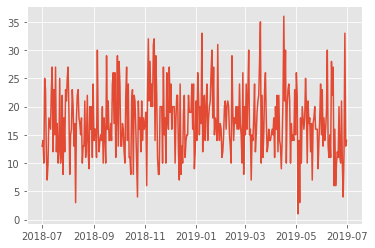

In [34]:
plt.plot(chipshny['DATE'], chipshny['SUM'])

In [35]:
chipshny['MONTH'] = pd.DatetimeIndex(chipshny['DATE']).month

In [36]:
chipshny['YEAR'] = pd.DatetimeIndex(chipshny['DATE']).year

In [37]:
chipshny

,DATE,SUM,MONTH,YEAR
42614,2018-07-01,13,7,2018
44977,2018-07-01,13,7,2018
45590,2018-07-01,13,7,2018
57773,2018-07-01,13,7,2018
45614,2018-07-01,13,7,2018
...,...,...,...,...
83664,2019-06-30,14,6,2019
45730,2019-06-30,14,6,2019
66241,2019-06-30,14,6,2019
66883,2019-06-30,14,6,2019


In [38]:
chipshny['MONTH_YEAR'] = pd.to_datetime(chipshny['DATE']).dt.to_period('M')

In [39]:
chipshny

,DATE,SUM,MONTH,YEAR,MONTH_YEAR
42614,2018-07-01,13,7,2018,2018-07
44977,2018-07-01,13,7,2018,2018-07
45590,2018-07-01,13,7,2018,2018-07
57773,2018-07-01,13,7,2018,2018-07
45614,2018-07-01,13,7,2018,2018-07
...,...,...,...,...,...
83664,2019-06-30,14,6,2019,2019-06
45730,2019-06-30,14,6,2019,2019-06
66241,2019-06-30,14,6,2019,2019-06
66883,2019-06-30,14,6,2019,2019-06


In [40]:
chipshny.drop(['DATE', 'MONTH', 'YEAR'], axis=1, inplace=True)

In [41]:
chipshny = chipshny.sort_values('MONTH_YEAR')

In [42]:
chipshny.head()

,SUM,MONTH_YEAR
42614,13,2018-07
49592,10,2018-07
32988,10,2018-07
272,10,2018-07
9390,12,2018-07


In [43]:
chipshny['SUM2'] = chipshny.groupby('MONTH_YEAR').SUM.transform(np.sum)

In [44]:
chipshny

,SUM,MONTH_YEAR,SUM2
42614,13,2018-07,5126
49592,10,2018-07,5126
32988,10,2018-07,5126
272,10,2018-07,5126
9390,12,2018-07,5126
...,...,...,...
82433,15,2019-06,4557
43070,15,2019-06,4557
565,15,2019-06,4557
69763,11,2019-06,4557


In [45]:
chipshny.drop_duplicates('MONTH_YEAR', inplace=True)

In [46]:
chipshny.drop('SUM', axis=1, inplace=True)

In [47]:
chipshny.head()

,MONTH_YEAR,SUM2
42614,2018-07,5126
3923,2018-08,5018
82686,2018-09,5215
12529,2018-10,4918
79544,2018-11,6785
